# Importing necessary libraries

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import lifelines
import shap
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2.10.0


# Data Importing and pre-processing

In [33]:
data=pd.read_csv('heloc_dataset_v1.csv')

In [34]:
data.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [38]:
data['RiskPerformance']=np.where(data['RiskPerformance']=='Bad',0,1)

In [39]:
data.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,0,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,0,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [64]:

X, y = (data.iloc[:,1:]).values,(data.iloc[:,0]).values

In [65]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

# Model Building- Basic XGB Booster

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [67]:
clf=xgb.XGBClassifier() 

In [68]:
clf.fit(X_train,y_train)

preds = clf.predict(X_test)

In [69]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.534650


In [70]:
# evaluate predictions
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.41%


# Shap values: feature importance

In [89]:
# make sure the SHAP values add up to marginal predictions
# pred = clf.predict(data_dmatrix, output_margin=True)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
# np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [96]:
features=(data.iloc[:,1:]).columns

### Overall feature importance of a model

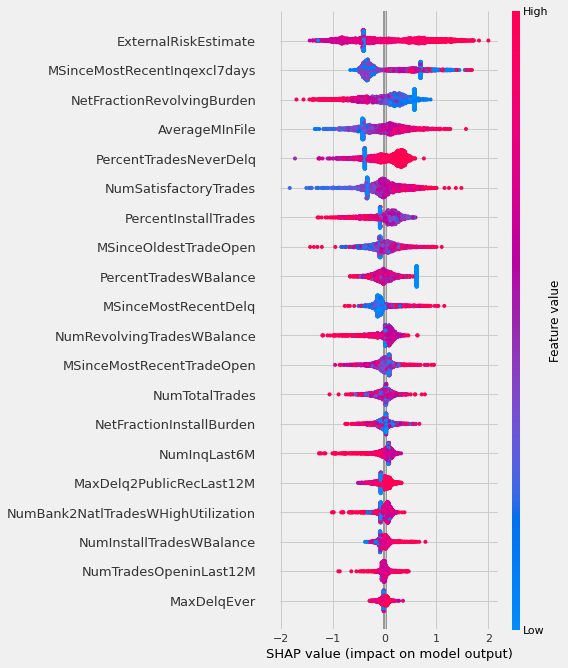

In [114]:
shap.summary_plot(shap_values, X_test, feature_names=features)

 
The side colors bar from high to low indicate the value of the feature, and at the x-axis tells risk, the positive side tells you there is a no risk (Good) and the negative side tells you that there is risk (Bad). Actually the negative side is 0 and the positive side is 1.

Higher value of ExternalRiskEstimat determines there is no risk (Good),  and lower value determines there is a risk (Bad). “MSinceMostRecentInqexcl7days” high value determines there is no risk (Good), and the low value determines there is a risk (Bad). 

The features are sorted by their significance in the data. We can see that “ExternalRiskEstimat” is the most important feature.

### Shap values for each input- tells the feature importance 

#### Case 1:  Consider we are predicting the value for X_test[0] 

In [118]:
predictions = clf.predict(X_test[0].reshape(1,23))
print(f'The predicted value: {predictions[0]}\nThe actual value: {y_test[0]}')

The predicted value: 0
The actual value: 0


Therefore the label is risk(bad)

##### Now lets see the shape value for the above input

In [119]:
# We can use the shapely values to interpret our model. 
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(explainer.expected_value, shap_values[0], features = features)

‘force_plot’ showing how each feature influences the output. 
‘ExternalRiskEstimat’, ‘MSinceMostRecentInqexcl7days’, are the biggest contributors in making predictions.

#### Case 2:  Consider we are predicting the value for X_test[3] 

In [122]:
predictions = clf.predict(X_test[3].reshape(1,23))
print(f'The predicted value: {predictions[0]}\nThe actual value: {y_test[3]}')

The predicted value: 1
The actual value: 1


Therefore the label is no risk(good)

In [123]:

shap.force_plot(explainer.expected_value, shap_values[3], features = features)

‘ExternalRiskEstimat’, ‘MSinceMostRecentInqexcl7days’, are the biggest contributors in making predictions.

#### Case 2:  Consider we are predicting the value for X_test[4] 

In [124]:
predictions = clf.predict(X_test[4].reshape(1,23))
print(f'The predicted value: {predictions[0]}\nThe actual value: {y_test[4]}')

The predicted value: 1
The actual value: 1


In [125]:
shap.force_plot(explainer.expected_value, shap_values[4], features = features)

‘ExternalRiskEstimat’, ‘NumTotalTrades’, are the biggest contributors in making predictions.